The following is an Exploratory Data Analysis for energy usage by Residential customers in the United States for the year 2023. The information is taken from a file that contains information from the year 2010 to the 2023 and filtered accordingly.

In [67]:
#Import relevant libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#Display the data frame prior to filtering.
df = pd.read_csv("HS861 2010-.csv")
display(df)

,Unnamed: 0,Unnamed: 1,RESIDENTIAL,Unnamed: 3,Unnamed: 4,Unnamed: 5,COMMERCIAL,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,TRANSPORTATION,Unnamed: 15,Unnamed: 16,Unnamed: 17,TOTAL,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,Revenues,Sales,Customers,Price,Revenues,Sales,Customers,Price,...,Customers,Price,Revenues,Sales,Customers,Price,Revenues,Sales,Customers,Price
1,Year,STATE,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,...,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
2,2023,AK,"490,072","2,050,667","296,192",23.90,"543,148","2,602,872","56,796",20.87,...,"1,161",18.70,0,0,0,0.00,"1,289,606","6,024,598","354,149",21.41
3,2023,AL,"4,593,824","31,409,652","2,353,274",14.63,"2,923,959","22,213,494","384,122",13.16,...,"7,239",7.11,0,0,0,0.00,"9,738,604","84,880,359","2,744,635",11.47
4,2023,AR,"2,251,157","18,373,971","1,459,802",12.25,"1,208,919","11,694,057","205,526",10.34,...,"36,612",6.87,40,268,2,14.93,"4,735,966","48,649,300","1,701,942",9.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2010,WA,"2,805,591","34,906,926","2,825,281",8.04,"2,125,160","28,833,281","353,330",7.37,...,"27,970",4.08,516,"6,949",6,7.42,"6,016,578","90,379,970","3,206,587",6.66
726,2010,WI,"2,820,621","22,299,493","2,594,698",12.65,"2,296,381","23,001,117","338,406",9.98,...,"4,496",6.85,0,0,0,0.00,"6,723,234","68,752,417","2,937,600",9.78
727,2010,WV,"1,094,174","12,442,583","867,948",8.79,"610,027","7,961,906","137,209",7.66,...,"12,348",5.86,365,"4,380",1,8.33,"2,385,580","32,031,803","1,017,506",7.45
728,2010,WY,"239,198","2,727,201","257,447",8.77,"320,135","4,317,140","59,642",7.42,...,"8,933",4.98,0,0,0,0.00,"1,060,618","17,113,458","326,022",6.20


In [69]:
#Filter the headers so as to code without error====
#Step 1: Load CSV without header
df = pd.read_csv("HS861 2010-.csv", header=None)

# Step 2: Use row index 2 as header
df.columns = df.iloc[2]      # row 2 as header
df = df[3:]                  # drop rows 0,1,2
df.reset_index(drop=True, inplace=True)

# Step 3: Clean column names (strip spaces)
df.columns = [str(col).strip() for col in df.columns]

# Step 4: Convert 'Year' column to numeric (adjust name if different)
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Filter rows for 2023
    df_2023 = df[df['Year'] == 2023]

    # Display filtered data
    display(df_2023)
    
    

else:
    print("❌ 'Year' column not found. Columns are:", df.columns.tolist())


,Year,STATE,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,...,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
0,2023,AK,"490,072","2,050,667","296,192",23.90,"543,148","2,602,872","56,796",20.87,...,"1,161",18.70,0,0,0,0.00,"1,289,606","6,024,598","354,149",21.41
1,2023,AL,"4,593,824","31,409,652","2,353,274",14.63,"2,923,959","22,213,494","384,122",13.16,...,"7,239",7.11,0,0,0,0.00,"9,738,604","84,880,359","2,744,635",11.47
2,2023,AR,"2,251,157","18,373,971","1,459,802",12.25,"1,208,919","11,694,057","205,526",10.34,...,"36,612",6.87,40,268,2,14.93,"4,735,966","48,649,300","1,701,942",9.73
3,2023,AZ,"5,466,059","38,992,365","3,068,552",14.02,"3,844,785","32,619,680","344,059",11.79,...,"7,614",8.11,"1,008","10,066",2,10.01,"10,470,980","85,918,798","3,420,227",12.19
4,2023,CA,"24,439,806","82,820,898","14,063,972",29.51,"27,006,847","112,935,566","1,766,915",23.91,...,"148,000",18.64,"94,387","725,431",12,13.01,"59,555,424","239,480,452","15,978,899",24.87
5,2023,CO,"2,859,285","19,999,333","2,517,452",14.30,"2,409,252","20,697,728","397,348",11.64,...,"15,358",8.50,"11,894","89,910",2,13.23,"6,536,530","55,565,819","2,930,160",11.76
6,2023,CT,"3,751,250","12,553,299","1,541,895",29.88,"2,273,489","11,373,591","156,310",19.99,...,"3,936",15.69,"38,545","178,899",3,21.55,"6,468,047","26,685,176","1,702,144",24.24
7,2023,DC,"390,035","2,371,637","312,982",16.45,"1,191,005","7,030,204","27,387",16.94,...,1,10.85,"29,943","301,384",3,9.94,"1,630,137","9,879,714","340,373",16.50
8,2023,DE,"775,833","4,931,847","468,358",15.73,"490,681","4,148,502","59,839",11.83,...,876,7.85,0,0,0,0.00,"1,423,532","11,081,671","529,073",12.85
9,2023,FL,"20,651,963","135,805,022","10,222,476",15.21,"11,620,543","97,255,443","1,292,988",11.95,...,"26,085",9.39,"8,054","71,105",2,11.33,"33,953,370","250,940,214","11,541,551",13.53


In [70]:
#Display columns for the Residential Customers by filtering to 5 colums:
# Load CSV without headers
df = pd.read_csv("HS861 2010-.csv", header=None)

# Make row index 2 the header
df.columns = df.iloc[2]
df = df[3:]  # Drop first three rows (0,1,2)
df.reset_index(drop=True, inplace=True)

# Clean column names
df.columns = [str(col).strip() for col in df.columns]

# Ensure 'Year' column exists and convert to numeric
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Filter for rows where Year == 2023
    df_2023 = df[df['Year'] == 2023]

    # Display only first 5 columns of 2023 data
    display(df_2023.iloc[:, :5])
else:
    print("❌ 'Year' column not found. Columns available:", df.columns.tolist())


,Year,STATE,Thousand Dollars,Megawatthours,Count
0,2023,AK,"490,072","2,050,667","296,192"
1,2023,AL,"4,593,824","31,409,652","2,353,274"
2,2023,AR,"2,251,157","18,373,971","1,459,802"
3,2023,AZ,"5,466,059","38,992,365","3,068,552"
4,2023,CA,"24,439,806","82,820,898","14,063,972"
5,2023,CO,"2,859,285","19,999,333","2,517,452"
6,2023,CT,"3,751,250","12,553,299","1,541,895"
7,2023,DC,"390,035","2,371,637","312,982"
8,2023,DE,"775,833","4,931,847","468,358"
9,2023,FL,"20,651,963","135,805,022","10,222,476"


In [71]:
# Display the top 10 states with the highest sales(Residential Megawatthours)
df_2023.iloc[:, :5].head(10)

,Year,STATE,Thousand Dollars,Megawatthours,Count
0,2023,AK,"490,072","2,050,667","296,192"
1,2023,AL,"4,593,824","31,409,652","2,353,274"
2,2023,AR,"2,251,157","18,373,971","1,459,802"
3,2023,AZ,"5,466,059","38,992,365","3,068,552"
4,2023,CA,"24,439,806","82,820,898","14,063,972"
5,2023,CO,"2,859,285","19,999,333","2,517,452"
6,2023,CT,"3,751,250","12,553,299","1,541,895"
7,2023,DC,"390,035","2,371,637","312,982"
8,2023,DE,"775,833","4,931,847","468,358"
9,2023,FL,"20,651,963","135,805,022","10,222,476"


In [72]:
# Display the bottom 10 states with the lowest sales (Residential Megawatthours)
df_2023.iloc[:, :5].tail(10)

,Year,STATE,Thousand Dollars,Megawatthours,Count
42,2023,TN,"5,041,363","41,350,567","3,106,778"
43,2023,TX,"24,388,838","168,610,875","12,257,008"
44,2023,UT,"1,268,526","11,328,264","1,244,066"
45,2023,VA,"6,145,511","43,095,838","3,615,939"
46,2023,VT,"453,095","2,176,314","322,405"
47,2023,WA,"4,276,679","38,940,142","3,319,836"
48,2023,WI,"3,749,633","22,218,861","2,813,580"
49,2023,WV,"1,437,864","10,233,824","864,768"
50,2023,WY,"337,897","2,947,863","283,729"
51,2023,US,"231,992,666","1,450,025,184","141,282,713"


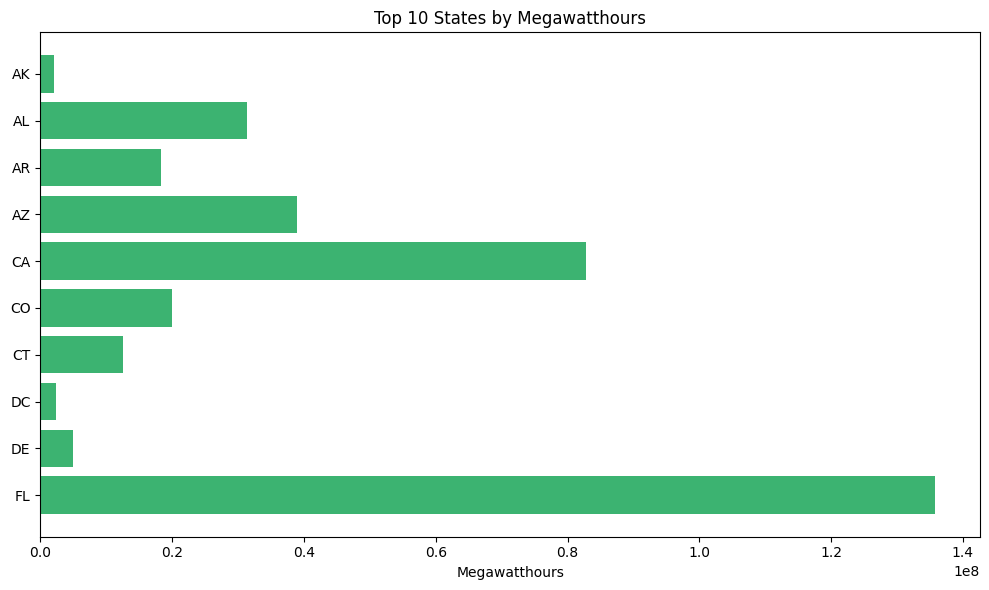

In [73]:
#Visualise the top 10 States with the highest sales(Megawatthours).

# Step 1: Get the subset of the first 5 columns and top 10 rows
subset = df_2023.iloc[:, :5].head(10).copy()

# Step 2: Find the Megawatthours column (auto-detect)
mwh_col = next((col for col in subset.columns if 'Megawatthours' in col), None)
state_col = next((col for col in subset.columns if 'STATE' in col or 'State' in col), None)

# Step 3: Proceed if both columns found
if mwh_col and state_col:
    # Clean Megawatthours column
    subset[mwh_col] = pd.to_numeric(subset[mwh_col].astype(str).str.replace(',', ''), errors='coerce')

    # Drop rows with missing or zero MWh
    top10 = subset.dropna(subset=[mwh_col])
    top10 = top10[top10[mwh_col] > 0]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top10[state_col][::-1], top10[mwh_col][::-1], color='mediumseagreen')
    plt.xlabel('Megawatthours')
    plt.title('Top 10 States by Megawatthours')
    plt.tight_layout()
    plt.show()

else:
    print("❌ Could not find required columns. Available columns:", subset.columns.tolist())


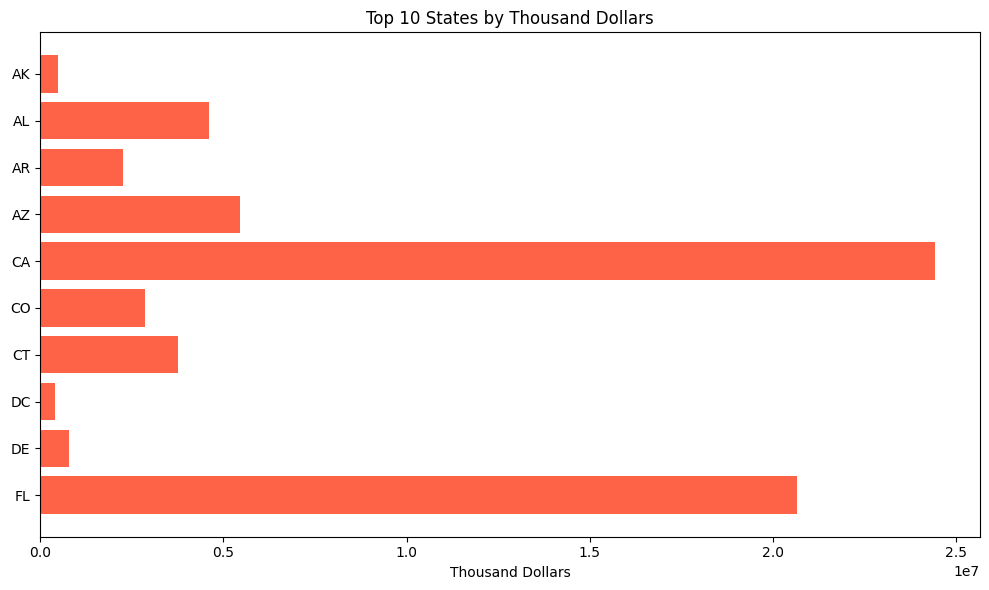

In [74]:
#Visualise the top 10 State with the highest Revenue (Thousand Dollars)

# Step 1: Take first 5 columns and 10 rows
subset = df_2023.iloc[:, :5].head(10).copy()

# Step 2: Detect relevant columns
dollar_col = next((col for col in subset.columns if 'Thousand Dollars' in col), None)
state_col = next((col for col in subset.columns if 'STATE' in col or 'State' in col), None)

# Step 3: Proceed if both columns are found
if dollar_col and state_col:
    # Convert 'Thousand Dollars' column to numeric (remove commas)
    subset[dollar_col] = pd.to_numeric(subset[dollar_col].astype(str).str.replace(',', ''), errors='coerce')

    # Drop rows with missing or zero dollar values
    top10 = subset.dropna(subset=[dollar_col])
    top10 = top10[top10[dollar_col] > 0]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top10[state_col][::-1], top10[dollar_col][::-1], color='tomato')
    plt.xlabel('Thousand Dollars')
    plt.title('Top 10 States by Thousand Dollars')
    plt.tight_layout()
    plt.show()

else:
    print("❌ Required columns not found in the first 5 columns.")
    print("Available columns:", subset.columns.tolist())

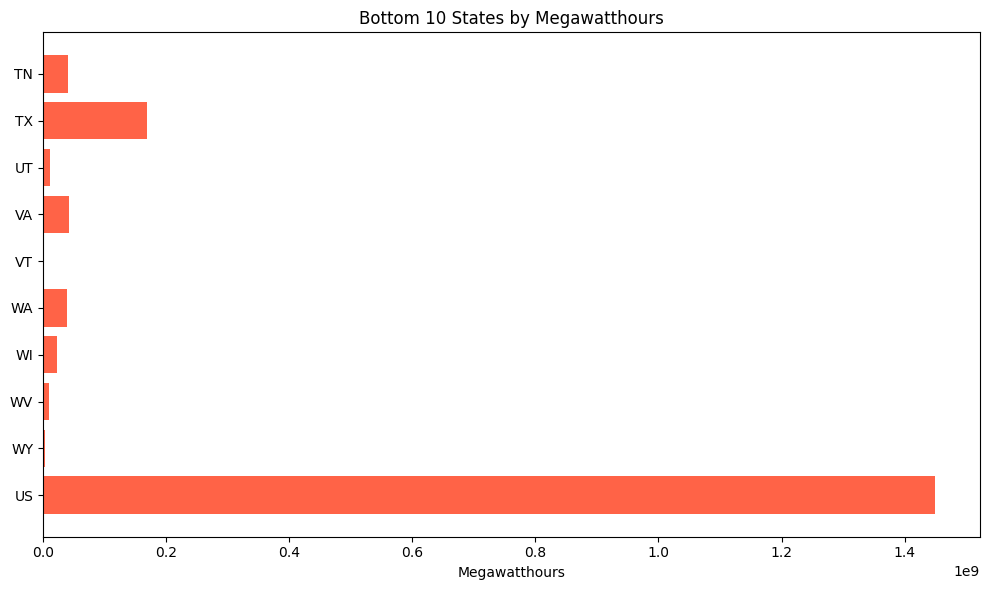

In [75]:
#Visualise the bottom 10 State with the lowest sales (Megawatthours)

# Step 1: Take first 5 columns and 10 rows
subset = df_2023.iloc[:, :5].tail(10).copy()

# Step 2: Detect relevant columns
megawatthours_col = next((col for col in subset.columns if 'Megawatthours' in col), None)
state_col = next((col for col in subset.columns if 'STATE' in col or 'State' in col), None)

# Step 3: Proceed if both columns are found
if megawatthours_col and state_col:
    # Convert 'Megawatthours' column to numeric (remove commas)
    subset[megawatthours_col] = pd.to_numeric(subset[megawatthours_col].astype(str).str.replace(',', ''), errors='coerce')

    # Drop rows with missing or zero megawatthours values
    bottom10 = subset.dropna(subset=[megawatthours_col])
    bottom10 = bottom10[bottom10[megawatthours_col] > 0]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(bottom10[state_col][::-1], bottom10[megawatthours_col][::-1], color='tomato')
    plt.xlabel('Megawatthours')
    plt.title('Bottom 10 States by Megawatthours')
    plt.tight_layout()
    plt.show()

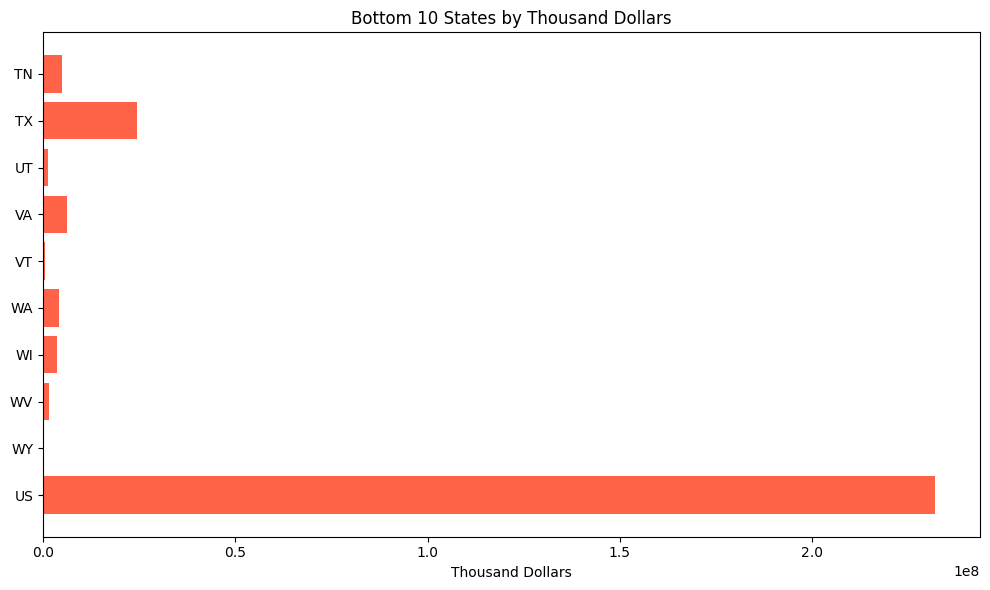

In [76]:
#Visualise the bottom 10 State with the lowest revenue (Thousand Dollars)

# Step 1: Take first 5 columns and 10 rows
subset = df_2023.iloc[:, :5].tail(10).copy()

# Step 2: Detect relevant columns
dollar_col = next((col for col in subset.columns if 'Thousand Dollars' in col), None)
state_col = next((col for col in subset.columns if 'STATE' in col or 'State' in col), None)

# Step 3: Proceed if both columns are found
if dollar_col and state_col:
    # Convert 'Megawatthours' column to numeric (remove commas)
    subset[dollar_col] = pd.to_numeric(subset[dollar_col].astype(str).str.replace(',', ''), errors='coerce')

    # Drop rows with missing or zero megawatthours values
    bottom10 = subset.dropna(subset=[dollar_col])
    bottom10 = bottom10[bottom10[dollar_col] > 0]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(bottom10[state_col][::-1], bottom10[dollar_col][::-1], color='tomato')
    plt.xlabel('Thousand Dollars')
    plt.title('Bottom 10 States by Thousand Dollars')
    plt.tight_layout()
    plt.show()

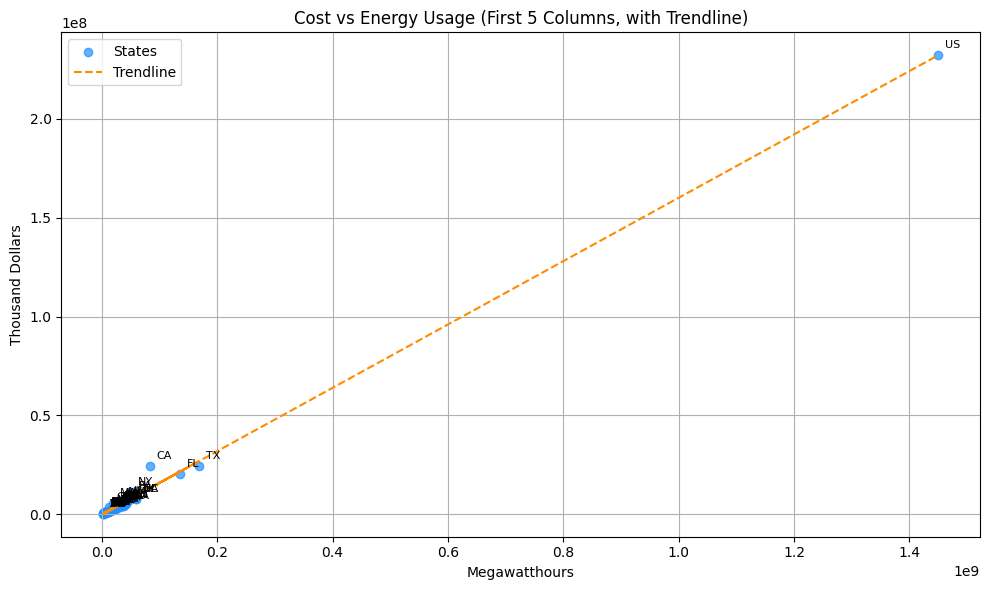

In [77]:
#Visualise the relations between Revenue (Thousand Dollars) and Sales (Megawatthours)

# Step 1: Get only the first 5 columns
subset = df_2023.iloc[:, :5].copy()

# Step 2: Detect relevant columns
dollar_col = next((col for col in subset.columns if 'Thousand Dollars' in col), None)
mwh_col = next((col for col in subset.columns if 'Megawatthours' in col), None)
state_col = next((col for col in subset.columns if 'STATE' in col or 'State' in col), None)

# Step 3: Proceed if all columns are found
if dollar_col and mwh_col and state_col:
    # Clean the numeric data
    subset[dollar_col] = pd.to_numeric(subset[dollar_col].astype(str).str.replace(',', ''), errors='coerce')
    subset[mwh_col] = pd.to_numeric(subset[mwh_col].astype(str).str.replace(',', ''), errors='coerce')

    # Filter valid data
    cleaned = subset.dropna(subset=[dollar_col, mwh_col])
    cleaned = cleaned[(cleaned[dollar_col] > 0) & (cleaned[mwh_col] > 0)]

    # X and Y for plotting and regression
    x = cleaned[mwh_col]
    y = cleaned[dollar_col]

    # Calculate trendline coefficients
    z = np.polyfit(x, y, 1)  # Linear regression: y = z[0]*x + z[1]
    p = np.poly1d(z)         # Build polynomial from coefficients

    # Plot scatter
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='dodgerblue', alpha=0.7, label='States')
    plt.plot(x, p(x), color='darkorange', linestyle='--', label='Trendline')

    # Annotate state names
    for _, row in cleaned.iterrows():
        plt.annotate(row[state_col], (row[mwh_col], row[dollar_col]), fontsize=8, xytext=(5, 5), textcoords='offset points')

    # Labels and title
    plt.xlabel('Megawatthours')
    plt.ylabel('Thousand Dollars')
    plt.title('Cost vs Energy Usage (First 5 Columns, with Trendline)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Required columns not found in the first 5 columns.")
    print("Available columns:", subset.columns.tolist())


In [78]:
# Calculate R²
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy ** 2
print(f"R² value: {r_squared:.4f}")


R² value: 0.9966


Text(0.05, 0.95, 'R² = 0.9966')

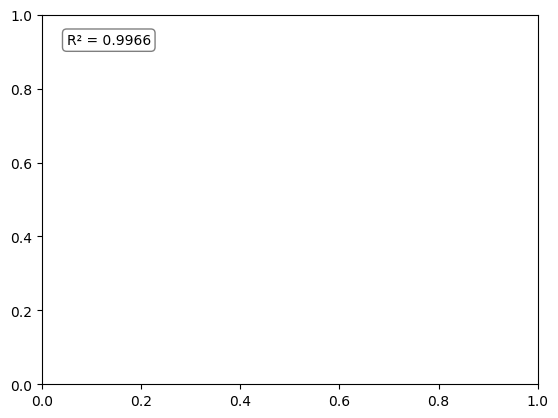

In [79]:
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))


In the energy industry:

R² ~ 1.0 between total energy sold and total revenue is expected in bulk data (e.g., total state-level annual data), especially if pricing is stable.

Much lower R² would be expected if analyzing sector-specific data, time-series (monthly), or retail pricing, due to fluctuations, subsidies, and rate structures.An R² of 0.9966 suggests a very strong, linear, and predictable relationship between energy sold and revenue — which is expected when analyzing aggregate state-level or sector-level annual data.

An R² of 0.9966 suggests a very strong, linear, and predictable relationship between energy sold and revenue — which is expected when analyzing aggregate state-level or sector-level annual data